# Presidential Approval Analysis

Data taken from FiveThirtyEight.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv('https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv')
data_raw.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,12/19/2019,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.696984,...,37.0,44.400017,38.573145,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,09:36:02 19 Dec 2019
1,Donald Trump,All polls,12/19/2019,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.241682,...,45.0,45.825044,43.486682,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,09:36:02 19 Dec 2019
2,Donald Trump,All polls,12/19/2019,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.223234,...,46.0,45.825044,44.486682,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,09:36:02 19 Dec 2019
3,Donald Trump,All polls,12/19/2019,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.150785,...,45.2,42.723653,44.100345,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,09:36:02 19 Dec 2019
4,Donald Trump,All polls,12/19/2019,1/22/2017,1/24/2017,Gallup,B,1500.0,a,0.208659,...,45.0,46.825044,43.486682,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49236,77248,1/25/2017,09:36:02 19 Dec 2019


In [3]:
data_raw.columns

Index(['president', 'subgroup', 'modeldate', 'startdate', 'enddate',
       'pollster', 'grade', 'samplesize', 'population', 'weight', 'influence',
       'approve', 'disapprove', 'adjusted_approve', 'adjusted_disapprove',
       'multiversions', 'tracking', 'url', 'poll_id', 'question_id',
       'createddate', 'timestamp'],
      dtype='object')

In [4]:
data_raw.index.unique()

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10550, 10551, 10552, 10553, 10554, 10555, 10556, 10557, 10558,
            10559],
           dtype='int64', length=10560)

In [5]:
data_clean = data_raw

data_clean['start_date_ordinal'] = pd.to_datetime(data_clean['startdate']).apply(lambda date: date.toordinal())
data_clean['end_date_ordinal'] = pd.to_datetime(data_clean['enddate']).apply(lambda date: date.toordinal())
data_clean['model_date_ordinal'] = pd.to_datetime(data_clean['modeldate']).apply(lambda date: date.toordinal())

data_clean.startdate = data_clean.startdate.astype("datetime64")
data_clean.enddate = data_clean.enddate.astype("datetime64")
data_clean.modeldate = data_clean.modeldate.astype("datetime64")

data_clean[['startdate','enddate','modeldate','start_date_ordinal','end_date_ordinal','model_date_ordinal']].head()

,startdate,enddate,modeldate,start_date_ordinal,end_date_ordinal,model_date_ordinal
0,2017-01-20,2017-01-22,2019-12-19,736349,736351,737412
1,2017-01-20,2017-01-22,2019-12-19,736349,736351,737412
2,2017-01-21,2017-01-23,2019-12-19,736350,736352,737412
3,2017-01-20,2017-01-24,2019-12-19,736349,736353,737412
4,2017-01-22,2017-01-24,2019-12-19,736351,736353,737412


In [6]:
#drop polls without a grade

indices = data_clean.index

for i in indices:
    if(data_clean['grade'].isna().loc[i]):
        data_clean.drop(axis = 0,index = i,inplace=True)

/home/alec/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


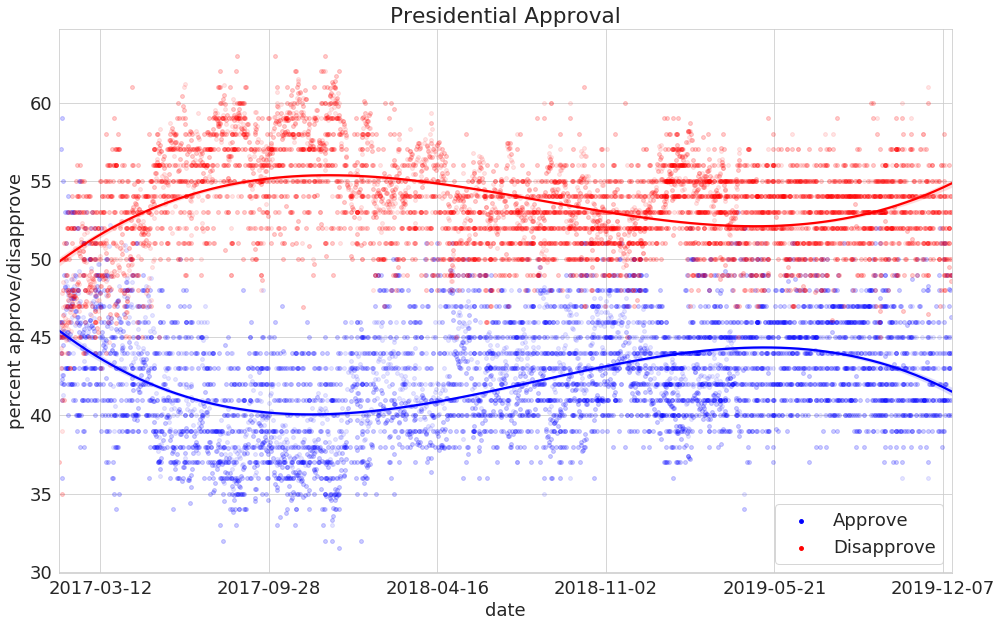

In [7]:
import matplotlib
import warnings
import datetime
warnings.simplefilter('ignore', np.RankWarning)

sns.set_style("whitegrid")

matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(16,10))

deg_order = 20

sns.regplot(x ='end_date_ordinal', y = data_clean['approve'], data = data_clean, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha':0.1}, label = "Approve",color = 'blue')
sns.regplot(x ='end_date_ordinal', y = data_clean['disapprove'], data = data_clean, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha':0.1}, label = "Disapprove",color = 'red')

plt.legend()
plt.xlabel('date')
plt.ylabel('percent approve/disapprove')

xticks = np.array(plt.xticks())
new_labels = [datetime.date.fromordinal(int(item)) for item in xticks[0]]
plt.xticks(new_labels,new_labels)
plt.xlim(data_clean['enddate'].min(),data_clean['enddate'].max())

plt.title('Presidential Approval')


leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

## Learning Poll Biases/House-effects

Compare full predictions compared to predictions based only on date

In [8]:
attributes = ['end_date_ordinal','population','grade','poll_id']
cat_attributes = ['population','grade']

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_clean_prep = data_clean[attributes]

for col in cat_attributes:
    data_clean_prep[col] = encoder.fit_transform(data_clean_prep[col])

/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from sklearn.model_selection import train_test_split

X = data_clean_prep
y_index = data_clean_prep.index
y_approve = data_clean['approve']
y_disapprove= data_clean['disapprove']


X_train, X_valid, y_train_index, y_valid_index = train_test_split(X, y_index,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=42)


In [11]:
y_train_approve = y_approve.loc[y_train_index]
y_train_disapprove = y_disapprove.loc[y_train_index]


y_valid_approve = y_approve.loc[y_valid_index]
y_valid_disapprove = y_disapprove.loc[y_valid_index]


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model_approve = RandomForestRegressor(random_state = 42)
forest_model_disapprove = RandomForestRegressor(random_state = 42)

forest_model_approve.fit(X_train,y_train_approve)
forest_model_disapprove.fit(X_train,y_train_disapprove)


approve_preds = forest_model_approve.predict(X_valid)
disapprove_preds = forest_model_disapprove.predict(X_valid)


print(mean_absolute_error(approve_preds,y_valid_approve))
print(mean_absolute_error(disapprove_preds,y_valid_disapprove))


/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7127334630350195
0.7564417962062258


In [13]:
X = X['end_date_ordinal']
X_train = X_train['end_date_ordinal']
X_valid = X_valid['end_date_ordinal']

X_train = np.array(X_train).reshape(-1,1)
X_valid = np.array(X_valid).reshape(-1,1)

In [14]:
forest_model_approve_date = RandomForestRegressor(random_state = 42)
forest_model_disapprove_date = RandomForestRegressor(random_state = 42)

forest_model_approve_date.fit(X_train,y_train_approve)
forest_model_disapprove_date.fit(X_train,y_train_disapprove)


approve_preds_date = forest_model_approve_date.predict(X_valid)
disapprove_preds_date = forest_model_disapprove_date.predict(X_valid)


print(mean_absolute_error(approve_preds_date,y_valid_approve))
print(mean_absolute_error(disapprove_preds_date,y_valid_disapprove))


/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


2.7552994242039395
1.9469925664444954


/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
X = data_clean_prep

In [16]:
forest_model_approve.fit(X,y_approve)
forest_model_disapprove.fit(X,y_disapprove)

approve_preds = forest_model_approve.predict(X)
disapprove_preds = forest_model_disapprove.predict(X)

In [17]:
X_date = np.array(X['end_date_ordinal']).reshape(-1,1)


forest_model_approve_date.fit(X_date,y_approve)
forest_model_disapprove_date.fit(X_date,y_disapprove)

approve_preds_date = forest_model_approve_date.predict(X_date)
disapprove_preds_date = forest_model_disapprove_date.predict(X_date)

In [18]:
data_clean['approve_bias'] = approve_preds - approve_preds_date
data_clean['disapprove_bias'] = disapprove_preds - disapprove_preds_date
data_clean['net_bias'] = data_clean['approve_bias'] - data_clean['disapprove_bias']

In [19]:
data_clean.columns

Index(['president', 'subgroup', 'modeldate', 'startdate', 'enddate',
       'pollster', 'grade', 'samplesize', 'population', 'weight', 'influence',
       'approve', 'disapprove', 'adjusted_approve', 'adjusted_disapprove',
       'multiversions', 'tracking', 'url', 'poll_id', 'question_id',
       'createddate', 'timestamp', 'start_date_ordinal', 'end_date_ordinal',
       'model_date_ordinal', 'approve_bias', 'disapprove_bias', 'net_bias'],
      dtype='object')

### "House Effect" Adjustments

Now that we have learned the house-effect biases of each poll, let's depict them and make adjustments based on them

Right now taking the average bias of each poll, so can then subtract off that bias for each instance.

In the future, may also want to consider, e.g., online vs. live call polling effects?

In [20]:
for pollster in data_clean.pollster.unique():
    data_pollster = data_clean[data_clean['pollster'] == pollster]
    if data_pollster.pollster.count() > 5:
        print(pollster + ' (poll count: ' + str(data_pollster.pollster.count()) + ')')
        print('\t' + 'Approve bias: ' + '%0.2f' % data_pollster['approve_bias'].mean())
        print('\t' + 'Disapprove bias: ' + '%0.2f' % data_pollster['disapprove_bias'].mean())
        print('\t' + 'Net bias: ' + '%0.2f' % data_pollster['net_bias'].mean())



Morning Consult (poll count: 735)
	Approve bias: -0.55
	Disapprove bias: -0.51
	Net bias: -0.04
Gallup (poll count: 818)
	Approve bias: -2.25
	Disapprove bias: 1.36
	Net bias: -3.61
Ipsos (poll count: 2537)
	Approve bias: -0.96
	Disapprove bias: 0.74
	Net bias: -1.70
Quinnipiac University (poll count: 112)
	Approve bias: -3.10
	Disapprove bias: 1.43
	Net bias: -4.53
Rasmussen Reports/Pulse Opinion Research (poll count: 1470)
	Approve bias: 4.18
	Disapprove bias: -1.41
	Net bias: 5.59
YouGov (poll count: 2158)
	Approve bias: -1.25
	Disapprove bias: -0.78
	Net bias: -0.47
Public Policy Polling (poll count: 70)
	Approve bias: -0.57
	Disapprove bias: -0.40
	Net bias: -0.17
SurveyMonkey (poll count: 446)
	Approve bias: 1.31
	Disapprove bias: 0.59
	Net bias: 0.72
IBD/TIPP (poll count: 70)
	Approve bias: -2.83
	Disapprove bias: 0.90
	Net bias: -3.72
CNN/Opinion Research Corp. (poll count: 6)
	Approve bias: 0.66
	Disapprove bias: 2.63
	Net bias: -1.98
CBS News (poll count: 37)
	Approve bias: -

In [21]:
data_clean['pollster_approve_bias'] = data_clean.index
data_clean['pollster_disapprove_bias'] = data_clean.index


In [22]:
for pollster in data_clean.pollster.unique():
    data_pollster = data_clean[data_clean['pollster'] == pollster]
    data_clean.replace({'pollster_approve_bias':np.array(data_pollster.index)},
                       data_pollster['approve_bias'].mean(),inplace = True)
    data_clean.replace({'pollster_disapprove_bias':np.array(data_pollster.index)},
                       data_pollster['disapprove_bias'].mean(),inplace = True)


In [23]:
data_clean.pollster_approve_bias.head()

0   -0.552873
1   -2.247442
2   -2.247442
3   -0.964907
4   -2.247442
Name: pollster_approve_bias, dtype: float64

In [24]:
data_clean['my_adjusted_approve'] = data_clean['approve'] - data_clean['pollster_approve_bias']
data_clean['my_adjusted_disapprove'] = data_clean['disapprove'] - data_clean['pollster_disapprove_bias']

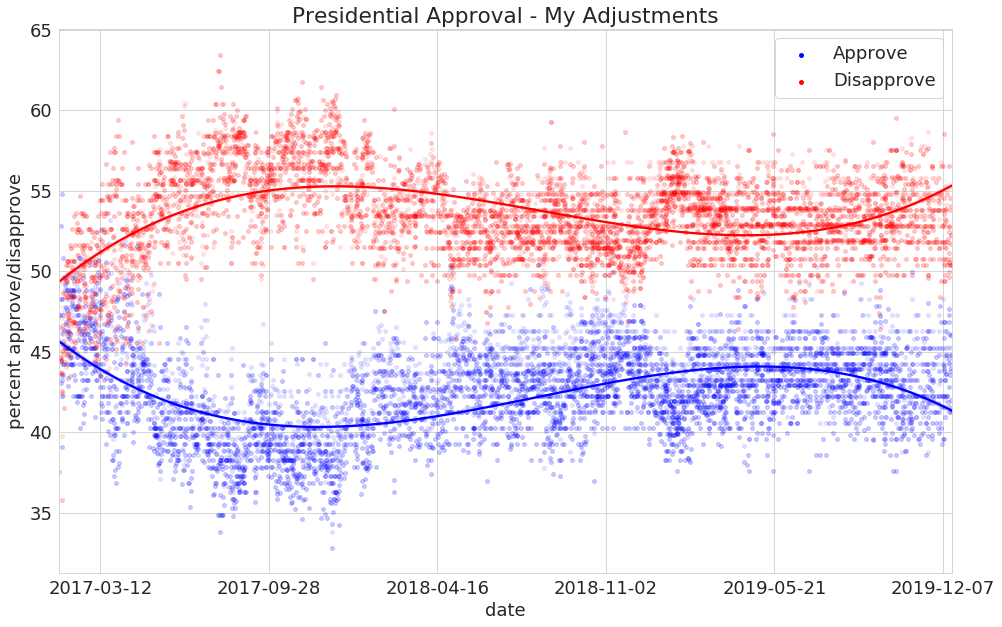

In [25]:
plt.figure(figsize=(16,10))

deg_order = 20

sns.regplot(x ='end_date_ordinal', y = data_clean['my_adjusted_approve'], data = data_clean, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha':0.1}, label = "Approve",color = 'blue')
sns.regplot(x ='end_date_ordinal', y = data_clean['my_adjusted_disapprove'], data = data_clean, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha':0.1}, label = "Disapprove",color = 'red')

plt.legend()
plt.xlabel('date')
plt.ylabel('percent approve/disapprove')

xticks = np.array(plt.xticks())
new_labels = [datetime.date.fromordinal(int(item)) for item in xticks[0]]
plt.xticks(new_labels,new_labels)
plt.xlim(data_clean['enddate'].min(),data_clean['enddate'].max())

plt.title('Presidential Approval - My Adjustments')


leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

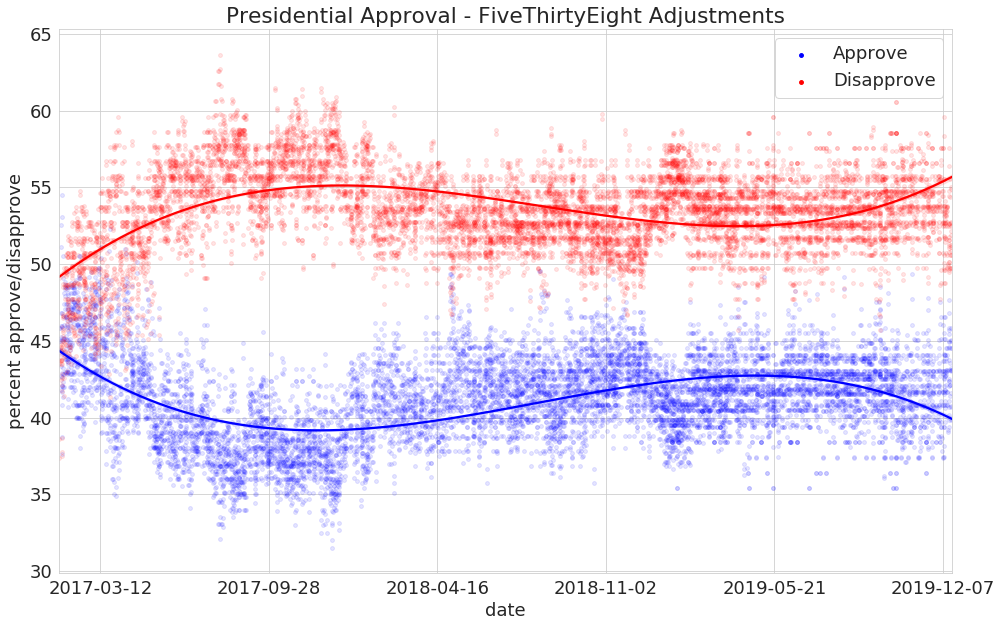

In [26]:
plt.figure(figsize=(16,10))

deg_order = 20

sns.regplot(x ='end_date_ordinal', y = data_clean['adjusted_approve'], data = data_clean, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha':0.1}, label = "Approve",color = 'blue')
sns.regplot(x ='end_date_ordinal', y = data_clean['adjusted_disapprove'], data = data_clean, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha':0.1}, label = "Disapprove",color = 'red')

plt.legend()
plt.xlabel('date')
plt.ylabel('percent approve/disapprove')

xticks = np.array(plt.xticks())
new_labels = [datetime.date.fromordinal(int(item)) for item in xticks[0]]
plt.xticks(new_labels,new_labels)
plt.xlim(data_clean['enddate'].min(),data_clean['enddate'].max())

plt.title('Presidential Approval - FiveThirtyEight Adjustments')


leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

In [27]:
#Some monthly numbers

date_begin = data_clean['end_date_ordinal'].max() - 360
date_end = data_clean['end_date_ordinal'].max() - 330

data_dates = data_clean[data_clean['end_date_ordinal'] > date_begin]
data_dates = data_dates[data_dates['end_date_ordinal'] < date_end]
data_dates.head()

print(data_dates['enddate'].min().month_name(), data_dates['enddate'].min().day, data_dates['enddate'].min().year,
      ' to ', data_dates['enddate'].max().month_name(), data_dates['enddate'].max().day, data_dates['enddate'].max().year)
print('approve: ', data_dates['my_adjusted_approve'].mean())
print('disapprove: ' , data_dates['my_adjusted_disapprove'].mean(), '\n')


date_begin = data_clean['end_date_ordinal'].max() - 180
date_end = data_clean['end_date_ordinal'].max() - 150

data_dates = data_clean[data_clean['end_date_ordinal'] > date_begin]
data_dates = data_dates[data_dates['end_date_ordinal'] < date_end]
data_dates.head()
print(data_dates['enddate'].min().month_name(), data_dates['enddate'].min().day, data_dates['enddate'].min().year,
      ' to ', data_dates['enddate'].max().month_name(), data_dates['enddate'].max().day, data_dates['enddate'].max().year)
print('approve: ', data_dates['my_adjusted_approve'].mean())
print('disapprove: ' , data_dates['my_adjusted_disapprove'].mean(), '\n')

date_begin = data_clean['end_date_ordinal'].max() - 120
date_end = data_clean['end_date_ordinal'].max() - 90

data_dates = data_clean[data_clean['end_date_ordinal'] > date_begin]
data_dates = data_dates[data_dates['end_date_ordinal'] < date_end]
data_dates.head()
print(data_dates['enddate'].min().month_name(), data_dates['enddate'].min().day, data_dates['enddate'].min().year,
      ' to ', data_dates['enddate'].max().month_name(), data_dates['enddate'].max().day, data_dates['enddate'].max().year)
print('approve: ', data_dates['my_adjusted_approve'].mean())
print('disapprove: ' , data_dates['my_adjusted_disapprove'].mean(), '\n')

date_begin = data_clean['end_date_ordinal'].max() - 30
date_end = data_clean['end_date_ordinal'].max() 

data_dates = data_clean[data_clean['end_date_ordinal'] > date_begin]
data_dates = data_dates[data_dates['end_date_ordinal'] < date_end]
data_dates.head()
print(data_dates['enddate'].min().month_name(), data_dates['enddate'].min().day, data_dates['enddate'].min().year,
      ' to ', data_dates['enddate'].max().month_name(), data_dates['enddate'].max().day, data_dates['enddate'].max().year)
print('approve: ', data_dates['my_adjusted_approve'].mean())
print('disapprove: ' , data_dates['my_adjusted_disapprove'].mean(), '\n')


December 24 2018  to  January 21 2019
approve:  42.121492555392614
disapprove:  54.25798506249265 

June 22 2019  to  July 20 2019
approve:  43.7879970045372
disapprove:  52.61354527878263 

August 21 2019  to  September 18 2019
approve:  43.621088338737486
disapprove:  53.068840457748955 

November 19 2019  to  December 17 2019
approve:  43.32813454581086
disapprove:  52.84672101394059 

